## 데이터편향이 예측에 미치는 영향 - 타이타닉호 생존여부 머신러닝(SVM)으로 예측하기

### 1. 사용 패키지와 모듈 임포트

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split #학습데이터와 테스트데이터 분할
from sklearn import svm   #SVM 모델
from sklearn import metrics  #정확도 비교

import seaborn as sns 

pd.set_option('mode.chained_assignment',  None) # Warning 방지용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 2. 데이터 가져오기

In [5]:
df = pd.read_csv('/content/drive/MyDrive/데이터편향/titanic.csv')

data_df = df             # 데이터 모두 가져오는 경우
data_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,2,"Mellinger, Miss. Madeleine Violet",0,13.0,0,1,250644,19.5000,NaN,S,1
1,2,"Wells, Miss. Joan",0,4.0,1,1,29103,23.0000,NaN,S,1
2,2,"Duran y More, Miss. Florentina",0,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,1
3,3,"Bradley, Miss. Bridget Delia",0,22.0,0,0,334914,7.7250,NaN,Q,1
4,1,"Francatelli, Miss. Laura Mabel",0,30.0,0,0,PC 17485,56.9292,E36,C,1


In [ ]:
#pclass : Passenger Class, 승객등급
#name : 승객이름
#sex : 승객성별 (여성은 0, 남성은 1)
#age : 승객나이
#sibsp : 동승한 형제 또는 배우자 수
#parch : 동승한 부모 또는 자녀 수
#ticket : 티켓번호
#fare : 승객 지불 요금
#cabin : 선실이름
#embarked : 승선항(C=쉘 브르크, Q=퀸즈타운, S=사우스 햄튼)
#survived : 생존 여부(생존은 1, 아닌경우는 0)

In [6]:
#데이터의 행,열 개수 확인
data_df.shape  

(1046, 11)

In [7]:
#나이 데이터를 범주화 하기 위해서 10으로 나눈 몫에서 10을 곱해줌 
data_df['age'] = (data_df['age']//10) * 10  
data_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,2,"Mellinger, Miss. Madeleine Violet",0,10.0,0,1,250644,19.5000,NaN,S,1
1,2,"Wells, Miss. Joan",0,0.0,1,1,29103,23.0000,NaN,S,1
2,2,"Duran y More, Miss. Florentina",0,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,1
3,3,"Bradley, Miss. Bridget Delia",0,20.0,0,0,334914,7.7250,NaN,Q,1
4,1,"Francatelli, Miss. Laura Mabel",0,30.0,0,0,PC 17485,56.9292,E36,C,1


0    619
1    427
Name: survived, dtype: int64


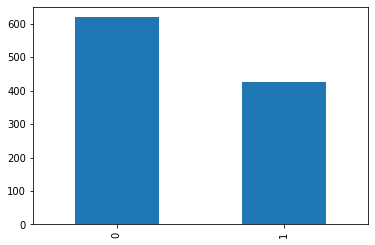

In [8]:
#생존자 1, 사망자 0, 학습데이터에서 각각 수를 새어 막데 그래프로 나타내기

print(data_df['survived'].value_counts())
data_df['survived'].value_counts().plot(kind='bar')

# 전체 데이터(1046명)에서 사망율은 59%(619명), 생존율은 41%(427명)

### 3. 데이터셋 나누기

In [9]:
#학습데이터와 테스트 데이터를 자동으로 나눠주는 함수

train, test = train_test_split(data_df, test_size= 0.2) #일반적으로 80%/20%, 70%/30% 비율로 분할
print("train data", train.shape)
print("test data",test.shape)

train data (836, 11)
test data (210, 11)


### 4. 학습에 사용할 변수(특징, Feature) 선택하기
#### - 온라인 강의 실습에서는 가장 정확도가 우수하게 나온 변수는 pclass와 sex 이다.

In [10]:
#데이터 타입, 각 아이템 개수, 누락데이터(NaN(Not a Number or Not Available) 등 확인
#누락데이터가 많이 없는 피처를 선택
data_df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1046 non-null   int64  
 1   name      1046 non-null   object 
 2   sex       1046 non-null   int64  
 3   age       1046 non-null   float64
 4   sibsp     1046 non-null   int64  
 5   parch     1046 non-null   int64  
 6   ticket    1046 non-null   object 
 7   fare      1046 non-null   float64
 8   cabin     272 non-null    object 
 9   embarked  1044 non-null   object 
 10  survived  1046 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 90.0+ KB


In [11]:
data_df.corr()   # 상관계수 보기

,pclass,sex,age,sibsp,parch,fare,survived
pclass,1.000000,0.144695,-0.392612,0.047221,0.017224,-0.565203,-0.320486
sex,0.144695,1.000000,0.068241,-0.095267,-0.221144,-0.188036,-0.538000
age,-0.392612,0.068241,1.000000,-0.237624,-0.149212,0.165773,-0.054425
sibsp,0.047221,-0.095267,-0.237624,1.000000,0.374456,0.141278,-0.012213
parch,0.017224,-0.221144,-0.149212,0.374456,1.000000,0.216799,0.114438
fare,-0.565203,-0.188036,0.165773,0.141278,0.216799,1.000000,0.249253
survived,-0.320486,-0.538000,-0.054425,-0.012213,0.114438,0.249253,1.000000


#### 4-1. 학습데이터에서 각 피쳐(Feature(특징데이터), 변수)가 생존자 예측 분류에 미치는 영향 탐색

0    486
1    350
Name: survived, dtype: int64


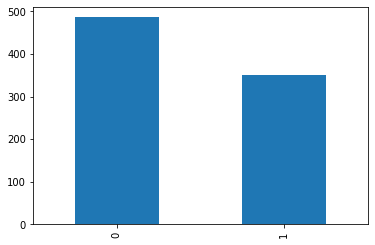

In [12]:
#생존자 1, 사망자 0, 학습데이터에서 각각 수를 세어 막데 그래프로 나타내기

print(train['survived'].value_counts())
train['survived'].value_counts().plot(kind='bar')

#전체 학습데이터(836명)에서 사망자는 60%(499명), 생존자는 40%(337명)

3    399
1    225
2    212
Name: pclass, dtype: int64


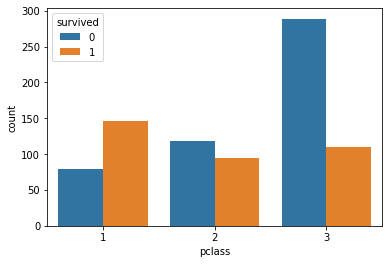

In [13]:
#학습데이터의 pclass 피처에서 survived 피처를 기준으로 그룹을 나누어 그룹별 분포를 살펴봄
#1은 생존자 0은 사망자

print(train['pclass'].value_counts()) # plclass내에서 각 그룹별 수를 세어줌
ax = sns.countplot(x='pclass', hue= 'survived', data= train)  # pclass의 count의 수를 hue에 설정된 카테고리로 나눠 그려줌

#1등급 클래스의 생존자가 가장 많고, 3등 클래스의 사망자가 가장 많음

1    525
0    311
Name: sex, dtype: int64


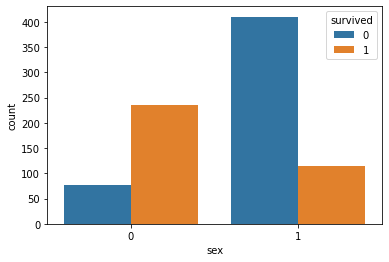

In [14]:
#학습데이터의 survived 피처를 기준으로 그룹을 나누어 그룹별 sex 피처의 분포를 살펴봄 (0은 여성, 1은 남성)
print(train['sex'].value_counts())
ax = sns.countplot(x='sex', hue= 'survived', data= train)

#여성 생존자의 생존율이 월등히 높음

20.0    274
30.0    187
10.0    111
40.0    104
0.0      71
50.0     57
60.0     25
70.0      6
80.0      1
Name: age, dtype: int64


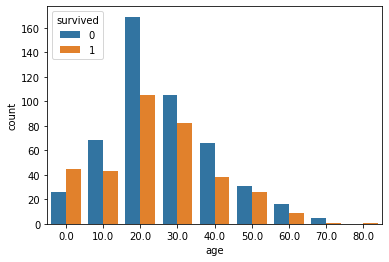

In [15]:
#학습데이터의 survived 피처를 기준으로 그룹을 나누어 그룹별 age 피처의 분포를 살펴봄 (0은 여성, 1은 남성)
print(train['age'].value_counts())
ax = sns.countplot(x='age', hue= 'survived', data= train)

#20,30대 탑승객이 가장 많고 가장 많이 사망

In [16]:
train.groupby(['pclass','sex']).mean()
#1등급 탑승객은 평균연령이 가장 높음, 1등급 클래스 여성이 가장 생존율이 높음, 2,3등급 클래스 남성이 가장 생존율이 낮음

age     sibsp     parch        fare  survived
pclass sex                                                     
1      0    31.904762  0.561905  0.485714  115.043771  0.961905
       1    36.666667  0.383333  0.341667   70.840278  0.375000
2      0    23.452381  0.488095  0.607143   22.958830  0.880952
       1    26.093750  0.375000  0.218750   20.735677  0.156250
3      0    17.377049  0.704918  0.852459   14.501607  0.491803
       1    21.768953  0.512635  0.285199   12.118786  0.180505

In [17]:
train.groupby(['pclass','age']).mean()
#연령대별로는 영아와 10대 생존율이 가장 높음

sex     sibsp     parch        fare  survived
pclass age                                                     
1      0.0   0.750000  0.500000  2.000000  129.864575  0.750000
       10.0  0.235294  0.647059  0.882353  109.894853  0.823529
       20.0  0.487805  0.536585  0.463415  101.214839  0.731707
       30.0  0.466667  0.383333  0.250000   95.628820  0.716667
       40.0  0.666667  0.400000  0.133333   65.844449  0.577778
       50.0  0.594595  0.540541  0.405405   92.445381  0.567568
       60.0  0.588235  0.470588  0.823529  101.690194  0.411765
       70.0  0.666667  0.333333  0.000000   54.336133  0.333333
       80.0  1.000000  0.000000  0.000000   30.000000  1.000000
2      0.0   0.500000  0.833333  1.388889   28.245144  1.000000
       10.0  0.583333  0.208333  0.208333   21.919617  0.416667
       20.0  0.581081  0.500000  0.243243   22.039920  0.418919
       30.0  0.634615  0.307692  0.307692   18.818669  0.403846
       40.0  0.666667  0.416667  0.416667   23.958333  0.333333
       50.0  0.571429  0.214286  0.285714   17.096429  0.357143
       60.0  0.800000  0.600000  0.200000   22.770000  0.200000
       70.0  1.000000  0.000000  0.000000   10.500000  0.000000
3      0.0   0.489796  2.061224  1.346939   21.959773  0.489796
       10.0  0.614286  0.885714  0.428571   13.926194  0.271429
       20.0  0.761006  0.182390  0.144654    9.873898  0.276730
       30.0  0.720000  0.320000  0.360000   11.727721  0.240000
       40.0  0.714286  0.314286  1.057143   14.712737  0.114286
       50.0  1.000000  0.166667  0.000000    8.941667  0.000000
       60.0  0.666667  0.000000  0.000000   13.862500  0.333333
       70.0  1.000000  0.000000  0.000000    7.762500  0.000000

### 위의 데이터에 따르면 생존율에 가장 많은 영향을 주는 변수는 pclass와 sex임을 알 수 있다.
### pclass와 sex 변수만을 선택해서 학습 모델을 만들어 보자.

### 5. 학습용 데이터셋 : 학습데이터와 레이블(정답) 나누기

In [19]:
train_data_df = train[['pclass','sex']]
train_data_df 

,pclass,sex
145,3,1
990,3,0
568,1,1
887,3,1
985,1,0
...,...,...
534,3,1
1009,2,0
1028,3,1
683,1,1


In [20]:
train_label_df = train[['survived']]
train_label_df

,survived
145,0
990,0
568,0
887,0
985,1
...,...
534,0
1009,1
1028,0
683,0


In [21]:
train_data = train_data_df.values           # 값부분만 가져오기(2차원 형태)
train_data

array([[3, 1],
       [3, 0],
       [1, 1],
       ...,
       [3, 1],
       [1, 1],
       [1, 1]])

In [22]:
train_label = train_label_df.values.ravel() # 값부분을 1차원으로 펴주기
train_label

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,

### 6. 테스트 데이터셋 : 학습데이터와 레이블(정답) 나누기

In [23]:
test_data_df = test[['pclass','sex']]
test_data_df

,pclass,sex
999,2,1
415,1,1
660,3,1
779,3,1
949,2,1
...,...,...
910,2,1
466,1,1
440,3,1
325,2,1


In [24]:
test_label_df = test[['survived']]  
test_label_df

,survived
999,0
415,0
660,1
779,0
949,0
...,...
910,0
466,1
440,0
325,0


In [25]:
test_data = test_data_df.values           # 값부분만 가져오기(2차원 형태)
test_data

array([[2, 1],
       [1, 1],
       [3, 1],
       [3, 1],
       [2, 1],
       [3, 0],
       [2, 1],
       [2, 1],
       [2, 1],
       [3, 0],
       [1, 0],
       [1, 0],
       [2, 0],
       [1, 1],
       [2, 0],
       [3, 1],
       [3, 1],
       [3, 0],
       [3, 0],
       [1, 0],
       [3, 1],
       [2, 0],
       [1, 1],
       [3, 1],
       [2, 1],
       [2, 0],
       [1, 0],
       [3, 1],
       [3, 1],
       [2, 0],
       [3, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [1, 1],
       [3, 1],
       [1, 0],
       [1, 0],
       [3, 1],
       [3, 1],
       [3, 0],
       [3, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [3, 1],
       [3, 0],
       [1, 1],
       [2, 1],
       [1, 1],
       [2, 1],
       [3, 0],
       [1, 1],
       [3, 0],
       [3, 1],
       [1, 0],
       [3, 1],
       [3, 1],
       [2, 1],
       [1, 1],
       [3, 1],
       [3, 0],
       [3, 0],
       [3, 1],
       [1, 1],
       [3, 1],
       [2,

In [26]:
test_label = test_label_df.values.ravel() # 값부분을 1차원으로 펴주기
test_label

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

### 7. SVM 모델 학습하기

In [27]:
clf = svm.SVC(C = 1, gamma = 0.1)     #svm 객체 생성
clf.fit(train_data, train_label)      #svm 모델로 학습데이터로 학습하기

SVC(C=1, gamma=0.1)

### 8. 테스트 데이터로 예측하기

In [28]:
pred_svm = clf.predict(test_data)
pred_svm  #svm이 예측한 생존 여부 값

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [29]:
#예측 결과를 test데이터에 추가해줌
test['survived_predict']=pred_svm
test

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,survived_predict
999,2,"Stokes, Mr. Philip Joseph",1,20.0,0,0,F.C.C. 13540,10.5000,NaN,S,0,0
415,1,"Penasco y Castellana, Mr. Victor de Satode",1,10.0,1,0,PC 17758,108.9000,C65,C,0,0
660,3,"Stranden, Mr. Juho",1,30.0,0,0,STON/O 2. 3101288,7.9250,NaN,S,1,0
779,3,"Panula, Master. Urho Abraham",1,0.0,4,1,3101295,39.6875,NaN,S,0,0
949,2,"Turpin, Mr. William John Robert",1,20.0,1,0,11668,21.0000,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
910,2,"Nasser, Mr. Nicholas",1,30.0,1,0,237736,30.0708,NaN,C,0,0
466,1,"Stengel, Mr. Charles Emil Henry",1,50.0,1,0,11778,55.4417,C116,C,1,0
440,3,"Coleff, Mr. Peju",1,30.0,0,0,349210,7.4958,NaN,S,0,0
325,2,"Dibden, Mr. William",1,10.0,0,0,S.O.C. 14879,73.5000,NaN,S,0,0


### 9. 테스트 데이터의 예측 결과 그래프로 나타내보기

3    102
1     59
2     49
Name: pclass, dtype: int64


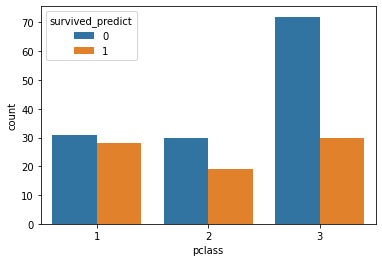

In [30]:
#테스트 데이터의 pclass 피처에서 survived_predict 피처를 기준으로 그룹을 나누어 그룹별 분포를 살펴봄
# 1은 생존자 0은 사망자

print(test['pclass'].value_counts()) # plclass내에서 각 그룹별 수를 세어줌
ax = sns.countplot(x='pclass', hue= 'survived_predict', data= test)  # pclass의 count의 수를 hue에 설정된 카테고리로 나눠 그려줌

#3등 클래스의 사망가능성이 매우 높다고 예측

1    133
0     77
Name: sex, dtype: int64


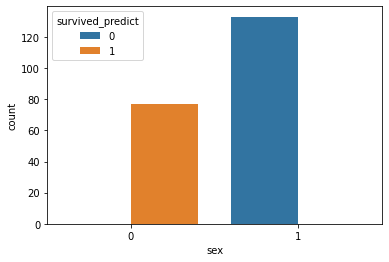

In [31]:
#테스트데이터의 survived_predict 피처를 기준으로 그룹을 나누어 그룹별 sex 피처의 분포를 살펴봄 (0은 여성, 1은 남성)
print(test['sex'].value_counts())
ax = sns.countplot(x='sex', hue= 'survived_predict', data= test)

#여성 사망자 수가 0, 남성 사망 가능성이 매우 높다고 예측

20.0    70
30.0    45
10.0    32
40.0    31
50.0    13
0.0     11
60.0     7
70.0     1
Name: age, dtype: int64


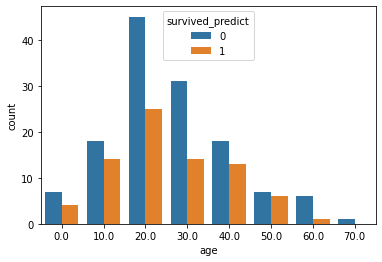

In [32]:
#학습데이터의 survived_predict 피처를 기준으로 그룹을 나누어 그룹별 age 피처의 분포를 살펴봄 (0은 여성, 1은 남성)
print(test['age'].value_counts())
ax = sns.countplot(x='age', hue= 'survived_predict', data= test)

#20,30대 탑승객이 가장 많고 가장 많이 사망할 것으로 예측

In [33]:
test.groupby(['pclass','sex']).mean()
#각 클래스별 여성은 생존, 남성은 사망할 것으로 예측

age     sibsp     parch        fare  survived  \
pclass sex                                                        
1      0    34.285714  0.535714  0.571429  100.571132  0.964286   
       1    35.806452  0.483871  0.290323   90.216668  0.258065   
2      0    22.105263  0.631579  0.947368   24.631579  0.947368   
       1    28.666667  0.266667  0.166667   21.781943  0.100000   
3      0    18.666667  0.866667  0.566667   15.282637  0.400000   
       1    21.388889  0.388889  0.291667   12.212787  0.125000   

            survived_predict  
pclass sex                    
1      0                 1.0  
       1                 0.0  
2      0                 1.0  
       1                 0.0  
3      0                 1.0  
       1                 0.0